In [1]:
import os
import pandas as pd
import numpy as np
np.random.seed(24)
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import random
random.set_seed(24)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
# Check the number of images in each sub-folders

# Train
train_normal = '../input/chest-xray-pneumonia/chest_xray/train/NORMAL'
train_pneumonia = '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'

print("Train Normal:", len(os.listdir(train_normal)))
print("Train Pneumonia:", len(os.listdir(train_pneumonia)))
print("Train Total:", len(os.listdir(train_normal)) + len(os.listdir(train_pneumonia)))

# Test
test_normal = '../input/chest-xray-pneumonia/chest_xray/test/NORMAL'
test_pneumonia = '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA'

print("\nTest Normal:", len(os.listdir(test_normal)))
print("Test Pneumonia:", len(os.listdir(test_pneumonia)))
print("Test Total:", len(os.listdir(test_normal)) + len(os.listdir(test_pneumonia)))

# Validation
val_normal = '../input/chest-xray-pneumonia/chest_xray/val/NORMAL'
val_pneumonia = '../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA'

print("\nVal Normal:", len(os.listdir(val_normal)))
print("Val Pneumonia:", len(os.listdir(val_pneumonia)))
print("Val Total:", len(os.listdir(val_normal)) + len(os.listdir(val_pneumonia)))

Train Normal: 1341
Train Pneumonia: 3875
Train Total: 5216

Test Normal: 234
Test Pneumonia: 390
Test Total: 624

Val Normal: 8
Val Pneumonia: 8
Val Total: 16


In [3]:
# Create file directory
train_dir = '../input/chest-xray-pneumonia/chest_xray/train'
test_dir = '../input/chest-xray-pneumonia/chest_xray/test'
val_dir = '../input/chest-xray-pneumonia/chest_xray/val'

In [4]:
# Create data generator
# Get all the train data (5216), test data (624), validation data (16) in the corresponding directory
# Scale data
# Set each image to 128×128 px
# Set binary class mode

train_generator = ImageDataGenerator(rescale=1./255)\
                  .flow_from_directory(train_dir, target_size=(128,128), batch_size=5216, class_mode='binary')

test_generator = ImageDataGenerator(rescale=1./255)\
                 .flow_from_directory(test_dir, target_size=(128,128), batch_size=624, class_mode='binary') 

val_generator = ImageDataGenerator(rescale=1./255)\
                .flow_from_directory(val_dir, target_size=(128,128), batch_size=16, class_mode='binary') 

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
# Create the data sets
# next - retrieve the next item from iterator
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

In [6]:
# Check the shape
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))

print ("\nX_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

print ("\nX_val shape: " + str(X_val.shape))
print ("y_val shape: " + str(y_val.shape))

X_train shape: (5216, 128, 128, 3)
y_train shape: (5216,)

X_test shape: (624, 128, 128, 3)
y_test shape: (624,)

X_val shape: (16, 128, 128, 3)
y_val shape: (16,)


In [7]:
# Check if the binary indicator was correctly labeled
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
def visualize_training_results(history):
    '''
    Input: keras history object 
    
    '''
    
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'val'], loc='upper left')
    
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'val'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

In [9]:
base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
base_model.add(layers.MaxPooling2D((2, 2)))

base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))

base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))

base_model.add(layers.Flatten())
base_model.add(layers.Dense(128, activation='relu'))
base_model.add(layers.Dense(1, activation='sigmoid'))

base_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [10]:
base_history = base_model.fit(X_train, y_train,
                              epochs=50,
                              batch_size=32,
                              validation_data=(X_val, y_val))

Epoch 1/50
163/163 [==============================] - 75s 453ms/step - loss: 0.4038 - accuracy: 0.8158 - val_loss: 0.2251 - val_accuracy: 0.9375
Epoch 2/50
163/163 [==============================] - 73s 448ms/step - loss: 0.1051 - accuracy: 0.9599 - val_loss: 0.2544 - val_accuracy: 0.8750
Epoch 3/50
163/163 [==============================] - 73s 451ms/step - loss: 0.0821 - accuracy: 0.9678 - val_loss: 0.4442 - val_accuracy: 0.7500
Epoch 4/50
163/163 [==============================] - 73s 446ms/step - loss: 0.0842 - accuracy: 0.9705 - val_loss: 0.1222 - val_accuracy: 0.9375
Epoch 5/50
163/163 [==============================] - 73s 447ms/step - loss: 0.0552 - accuracy: 0.9804 - val_loss: 0.2312 - val_accuracy: 0.8125
Epoch 6/50
163/163 [==============================] - 88s 540ms/step - loss: 0.0521 - accuracy: 0.9777 - val_loss: 0.9449 - val_accuracy: 0.6875
Epoch 7/50
163/163 [==============================] - 74s 455ms/step - loss: 0.0276 - accuracy: 0.9904 - val_loss: 0.5253 - val_ac

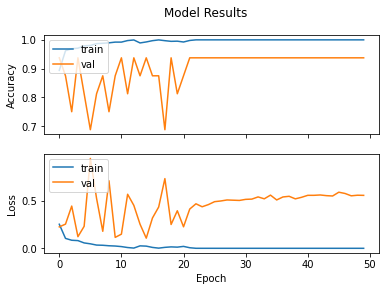

In [11]:
visualize_training_results(base_history)